In [ ]:
# ✅ Step 2: Split Dataset with Crop Distribution Preserved

import pandas as pd
from sklearn.model_selection import train_test_split

# 1️⃣ Load the preprocessed dataset
df = pd.read_csv("/content/preprocessed_fertilizer_dataset.csv")

# 2️⃣ Separate features and target
X = df.drop('fertilizer_name', axis=1)
y = df['fertilizer_name']

# 3️⃣ Stratified split based on 'crop' column
# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=X['crop']  # stratify based on crop distribution
)

# Second split: Validation (15%) and Test (15%) from the remaining 30%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=X_temp['crop']  # again stratify based on crop
)

# ✅ Print shapes
print("✅ Dataset Split Complete!")
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

# (Optional) Save the splits
X_train.to_csv("X_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


✅ Dataset Split Complete!
Train: (1540, 9) (1540,)
Validation: (330, 9) (330,)
Test: (330, 9) (330,)


In [ ]:
import pandas as pd

X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

print(X_train.shape)
print(y_train.head())


(1540, 9)
   fertilizer_name
0                5
1                1
2                0
3                5
4                5


In [ ]:
print("Crop distribution in Train:")
print(X_train['crop'].value_counts(normalize=True))

print("\nCrop distribution in Validation:")
print(X_val['crop'].value_counts(normalize=True))

print("\nCrop distribution in Test:")
print(X_test['crop'].value_counts(normalize=True))



Crop distribution in Train:
crop
4     0.318182
9     0.045455
8     0.045455
12    0.045455
13    0.045455
11    0.045455
7     0.045455
2     0.045455
3     0.045455
15    0.045455
5     0.045455
6     0.045455
1     0.045455
14    0.045455
10    0.045455
0     0.045455
Name: proportion, dtype: float64

Crop distribution in Validation:
crop
4     0.318182
7     0.045455
5     0.045455
10    0.045455
12    0.045455
11    0.045455
9     0.045455
1     0.045455
13    0.045455
14    0.045455
0     0.045455
2     0.045455
15    0.045455
3     0.045455
8     0.045455
6     0.045455
Name: proportion, dtype: float64

Crop distribution in Test:
crop
4     0.318182
7     0.045455
6     0.045455
8     0.045455
10    0.045455
11    0.045455
9     0.045455
1     0.045455
15    0.045455
12    0.045455
2     0.045455
0     0.045455
14    0.045455
5     0.045455
3     0.045455
13    0.045455
Name: proportion, dtype: float64


✅ Accuracy Scores:
Training Accuracy:   1.0000
Validation Accuracy: 0.9727
Test Accuracy:       0.9758

📊 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.97      0.90      0.94        40
           2       0.83      1.00      0.91        10
           3       0.33      1.00      0.50         1
           4       0.96      0.96      0.96        24
           5       1.00      0.99      1.00       182

    accuracy                           0.98       330
   macro avg       0.85      0.97      0.88       330
weighted avg       0.98      0.98      0.98       330



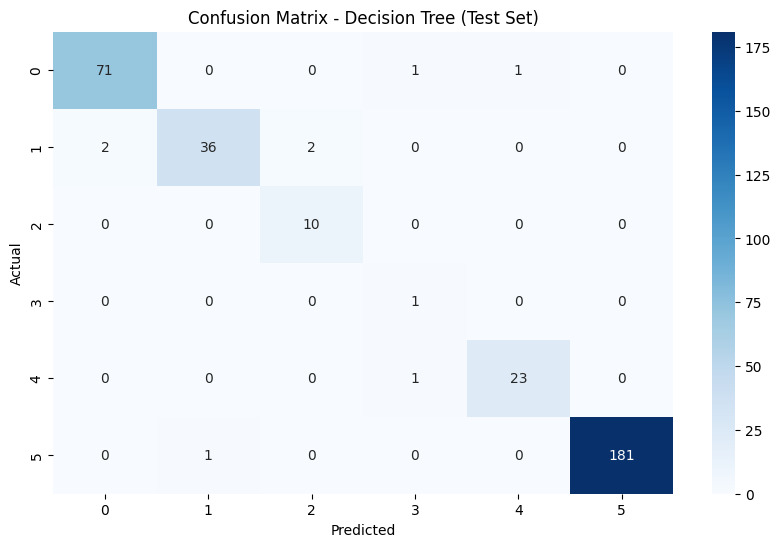

In [ ]:
# ✅ 1. Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ 2. Load train/val/test splits
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()

X_val = pd.read_csv("X_val.csv")
y_val = pd.read_csv("y_val.csv").values.ravel()

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").values.ravel()

# ✅ 3. Initialize and train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# ✅ 4. Evaluate on Train, Validation, and Test sets
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("✅ Accuracy Scores:")
print(f"Training Accuracy:   {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy:       {test_acc:.4f}")

# ✅ 5. Detailed classification report on test set
print("\n📊 Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# ✅ 6. (Optional) Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


✅ Decision Tree Done: Train=1.0000, Val=0.9727, Test=0.9758
✅ Logistic Regression Done: Train=0.7896, Val=0.7455, Test=0.7455
✅ Random Forest Done: Train=1.0000, Val=0.9758, Test=0.9848
✅ Gradient Boosting Done: Train=1.0000, Val=0.9758, Test=0.9879


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:25:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Done: Train=1.0000, Val=0.9879, Test=0.9909
✅ CatBoost Done: Train=1.0000, Val=0.9909, Test=0.9879

📊 Accuracy Comparison:
                 Model  Train Accuracy  Validation Accuracy  Test Accuracy
0        Decision Tree         1.00000             0.972727       0.975758
1  Logistic Regression         0.78961             0.745455       0.745455
2        Random Forest         1.00000             0.975758       0.984848
3    Gradient Boosting         1.00000             0.975758       0.987879
4              XGBoost         1.00000             0.987879       0.990909
5             CatBoost         1.00000             0.990909       0.987879


/tmp/ipython-input-979842387.py:79: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


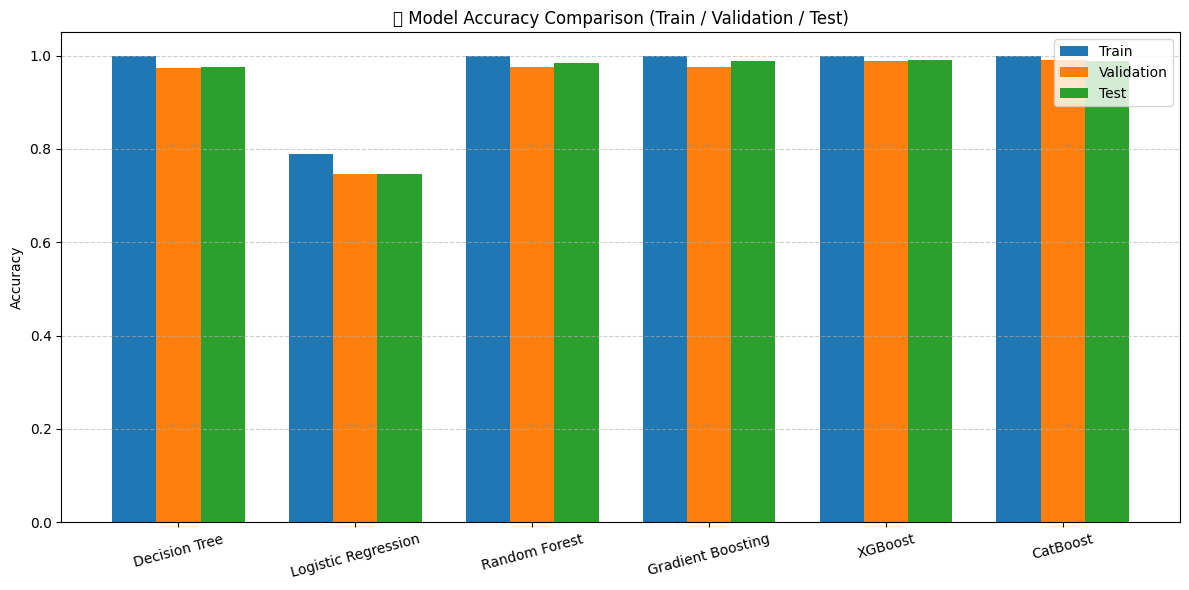

In [ ]:
# ✅ 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# ✅ 2. Load train/val/test splits
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()

X_val = pd.read_csv("X_val.csv")
y_val = pd.read_csv("y_val.csv").values.ravel()

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").values.ravel()

# ✅ 3. Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_seed=42)
}

# ✅ 4. Train & evaluate all models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Validation Accuracy": val_acc,
        "Test Accuracy": test_acc
    })
    print(f"✅ {name} Done: Train={train_acc:.4f}, Val={val_acc:.4f}, Test={test_acc:.4f}")

# ✅ 5. Create results DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Accuracy Comparison:")
print(results_df)

# ✅ 6. Plot accuracy comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df['Model']))
width = 0.25

plt.bar(x - width, results_df['Train Accuracy'], width, label='Train')
plt.bar(x, results_df['Validation Accuracy'], width, label='Validation')
plt.bar(x + width, results_df['Test Accuracy'], width, label='Test')

plt.xticks(x, results_df['Model'], rotation=15)
plt.ylabel("Accuracy")
plt.title("📊 Model Accuracy Comparison (Train / Validation / Test)")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


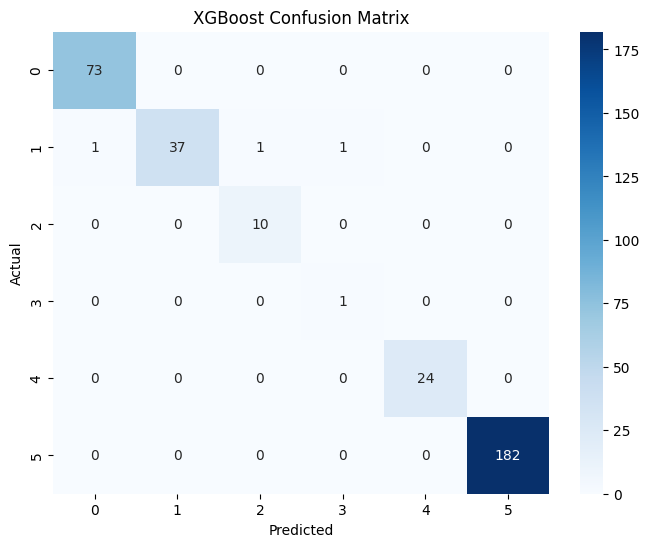

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.93      0.96        40
           2       0.91      1.00      0.95        10
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00       182

    accuracy                           0.99       330
   macro avg       0.90      0.99      0.93       330
weighted avg       0.99      0.99      0.99       330



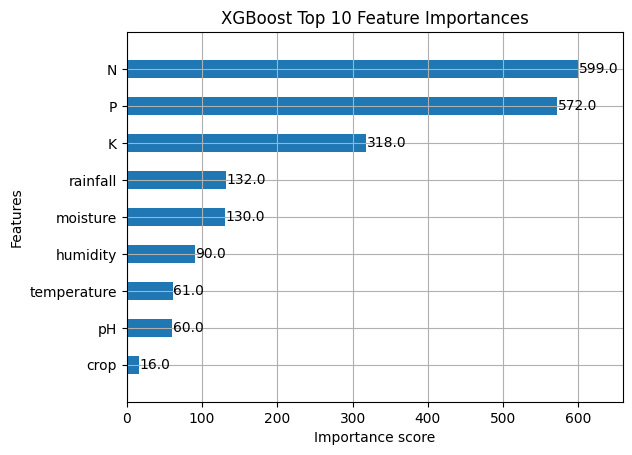

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# ✅ 7. XGBoost Detailed Evaluation
xgb_model = models["XGBoost"]  # Get the trained XGBoost model

# Predictions on test set
y_pred = xgb_model.predict(X_test)

# 1️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# 2️⃣ Precision, Recall, F1-score
print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred))

# 3️⃣ Feature Importance (Top 10)
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight', height=0.5)
plt.title('XGBoost Top 10 Feature Importances')
plt.show()


In [ ]:
import numpy as np

# Your input features (as a 2D array)
new_data = np.array([[1, -0.35, -0.1, -1, 0.5, 0, 1.8, 0.4, 3]])

# Predict using trained XGBoost
predicted_fertilizer = models["XGBoost"].predict(new_data)

print("Predicted Fertilizer:", predicted_fertilizer[0])


Predicted Fertilizer: 5
